## In this kernel, I will show a way to extract the actual underlying trend in the voltage signal using the [seasonal](https://github.com/welch/seasonal) package (which uses scipy periodograms). Then, the noise in the time series can be obtained by subtracting the trend from the noisy time series.

In [1]:
##### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import time

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.parquet', 'metadata_train.csv', 'sample_submission.csv', 'train.parquet', 'metadata_test.csv']


**Install seasonal**

In [2]:
!pip install --user seasonal
from seasonal import fit_seasons, adjust_seasons

  The scripts seasonal, seasonal.periodogram and seasonal.trend are installed in '/root/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


**Load a small part of the training data**

In [3]:
praq = pq.read_pandas('../input/train.parquet', columns=[str(i) for i in range(1000)]).to_pandas()
signals = praq.T.values.astype(float)
metadata = pd.read_csv('../input/metadata_train.csv', nrows=1000)
targets = metadata['target']

**Divide the data based on class**

In [4]:
pos_indices = []
neg_indices = []
for i in range(len(targets)):
    if targets[i] == 0:
        neg_indices.append(i)
    else:
        pos_indices.append(i)

indices = [index for index in range(signals.shape[1]) if index % 20 == 0]
neg_signals = signals[neg_indices]
pos_signals = signals[pos_indices]

**Visualize the actual signals and noises for non-faulty cases**

SIGNAL SAMPLE 1
Total time : 2.232201099395752 s


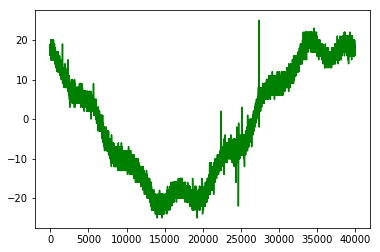

Trend


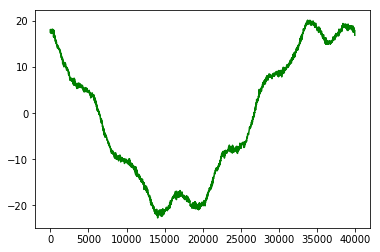

Noise


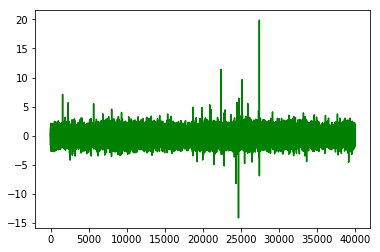

SIGNAL SAMPLE 2
Total time : 4.922648668289185 s


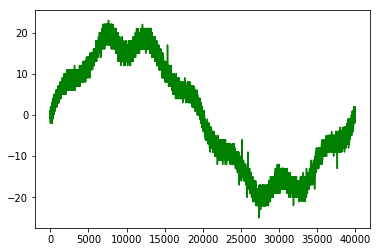

Trend


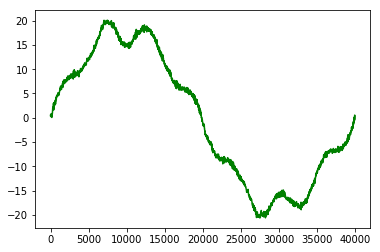

Noise


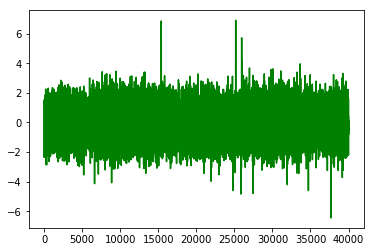

SIGNAL SAMPLE 3
Total time : 7.80433988571167 s


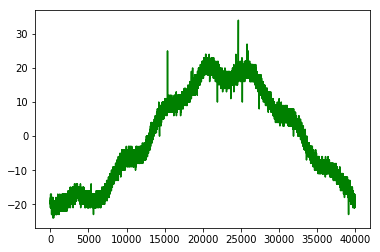

Trend


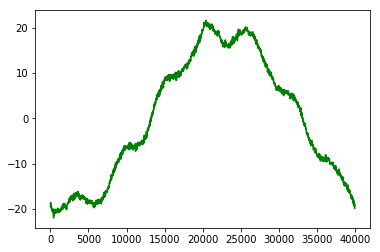

Noise


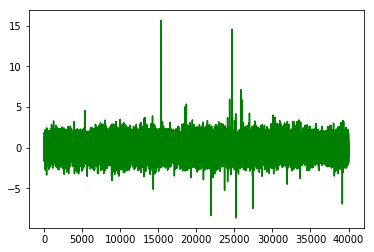

SIGNAL SAMPLE 4
Total time : 10.738069534301758 s


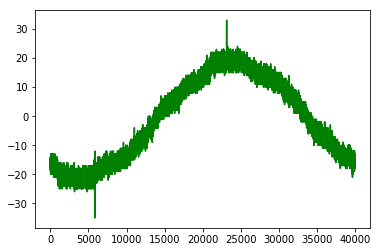

Trend


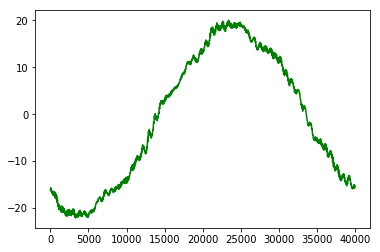

Noise


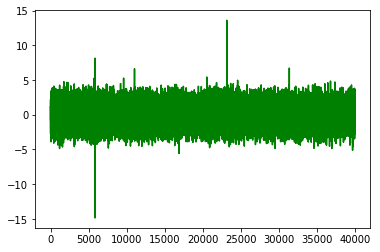

SIGNAL SAMPLE 5
Total time : 13.517912149429321 s


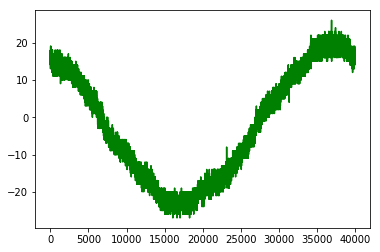

Trend


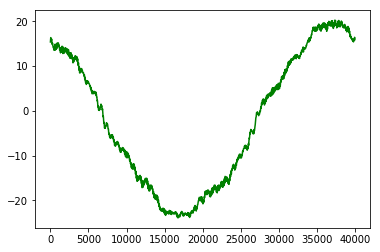

Noise


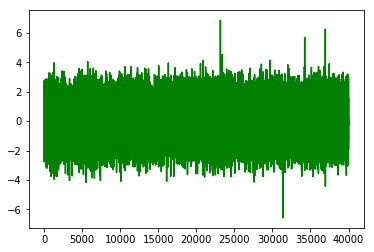

SIGNAL SAMPLE 6
Total time : 29.929261684417725 s


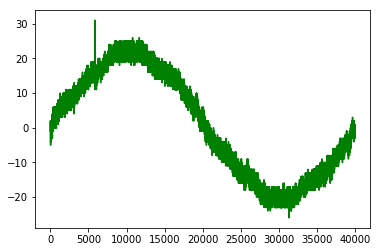

Trend


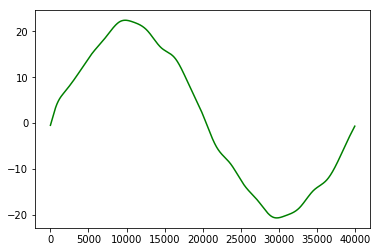

Noise


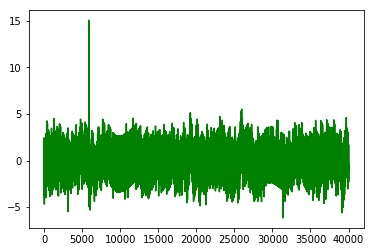

SIGNAL SAMPLE 7
Total time : 34.34891128540039 s


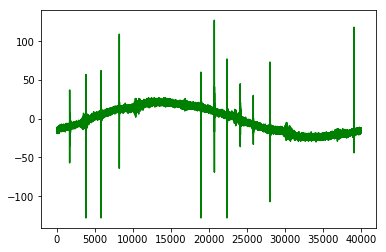

Trend


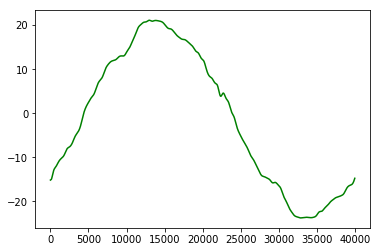

Noise


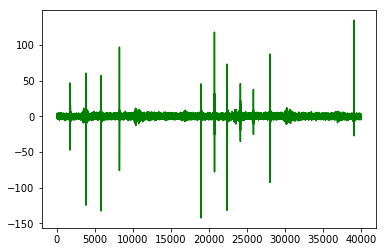

SIGNAL SAMPLE 8
Total time : 39.68383717536926 s


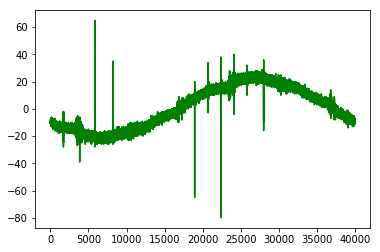

Trend


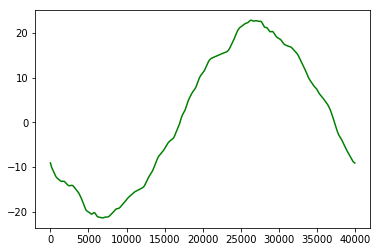

Noise


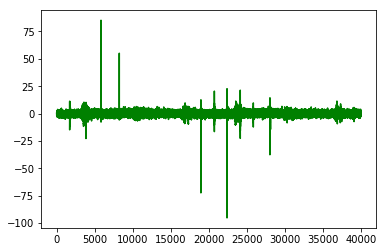

SIGNAL SAMPLE 9
Total time : 44.936434268951416 s


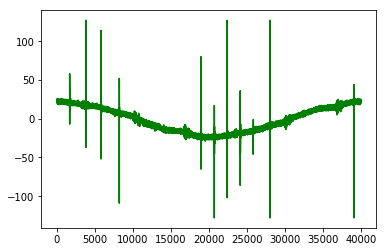

Trend


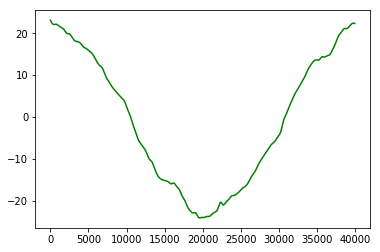

Noise


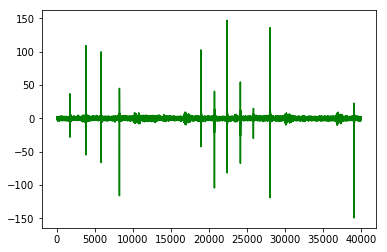

SIGNAL SAMPLE 10
Total time : 50.27829670906067 s


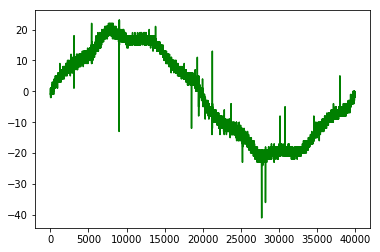

Trend


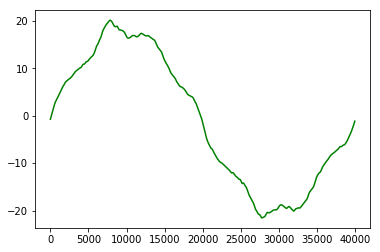

Noise


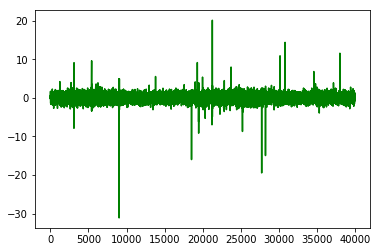

SIGNAL SAMPLE 11
Total time : 55.53814888000488 s


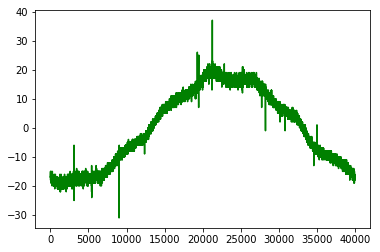

Trend


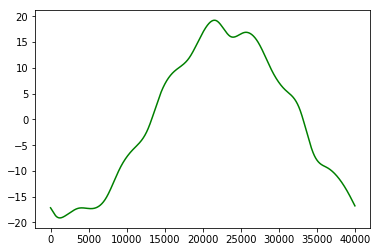

Noise


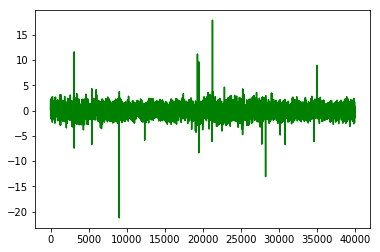

SIGNAL SAMPLE 12
Total time : 60.672163009643555 s


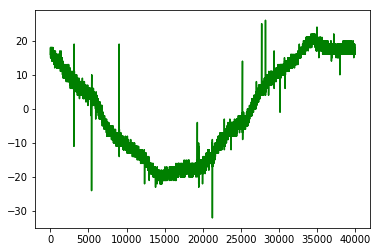

Trend


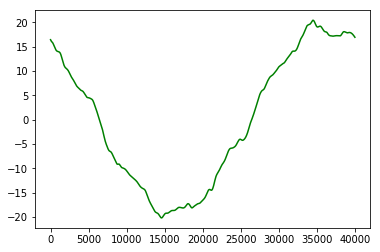

Noise


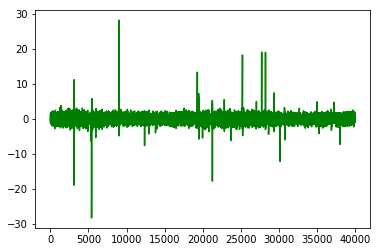

SIGNAL SAMPLE 13
Total time : 63.683998346328735 s


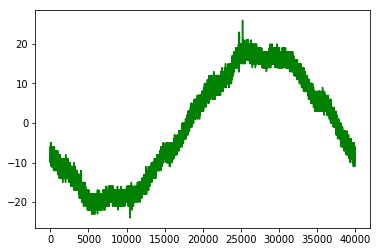

Trend


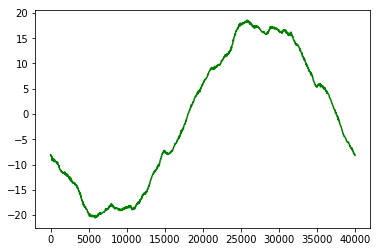

Noise


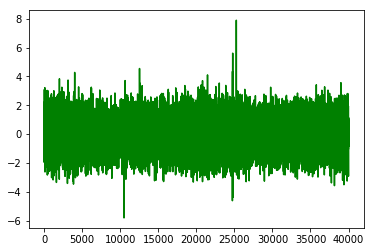

SIGNAL SAMPLE 14
Total time : 66.42197942733765 s


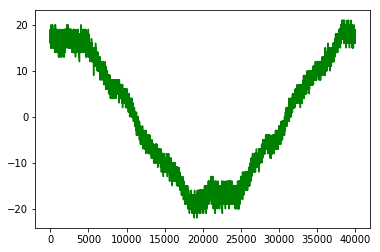

Trend


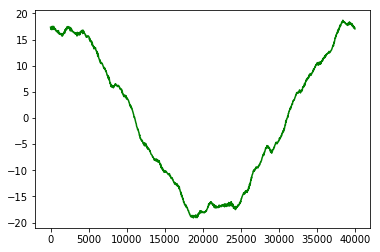

Noise


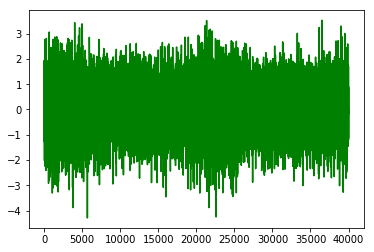

SIGNAL SAMPLE 15
Total time : 69.26177477836609 s


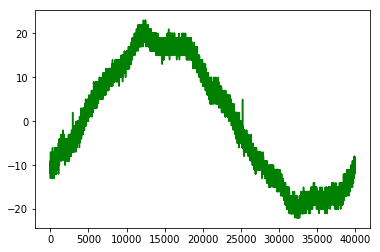

Trend


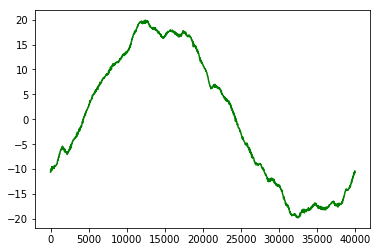

Noise


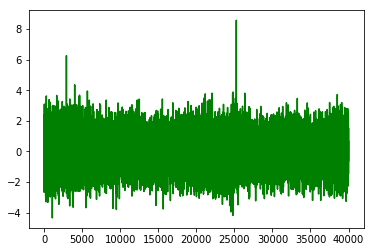

SIGNAL SAMPLE 16
Total time : 86.00603318214417 s


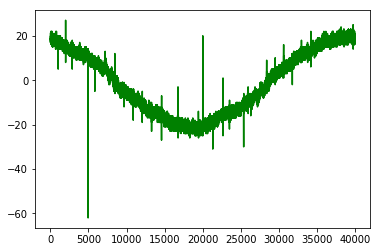

Trend


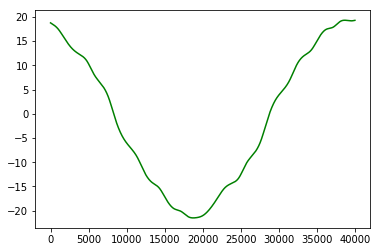

Noise


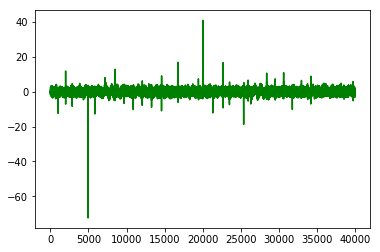

SIGNAL SAMPLE 17
Total time : 102.11489152908325 s


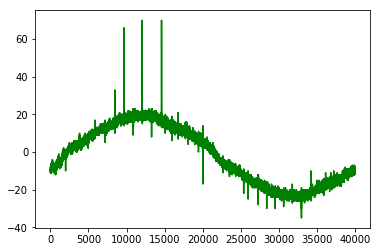

Trend


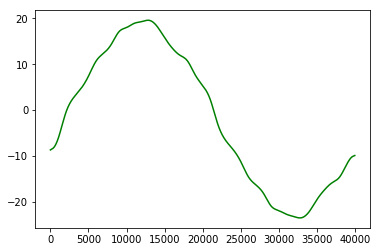

Noise


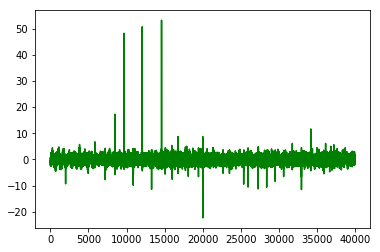

SIGNAL SAMPLE 18
Total time : 118.62361860275269 s


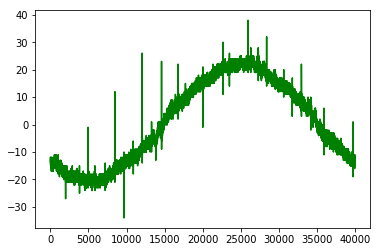

Trend


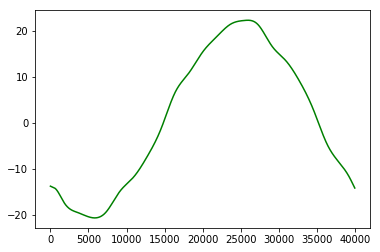

Noise


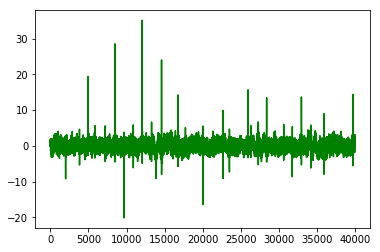

SIGNAL SAMPLE 19
Total time : 122.98680090904236 s


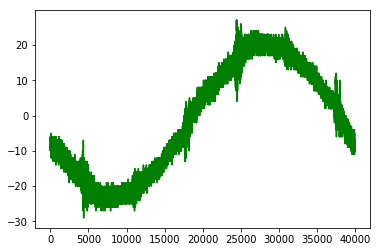

Trend


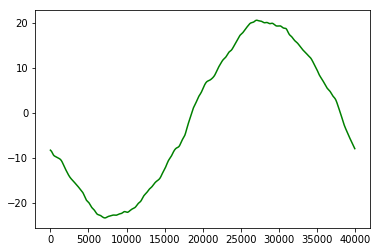

Noise


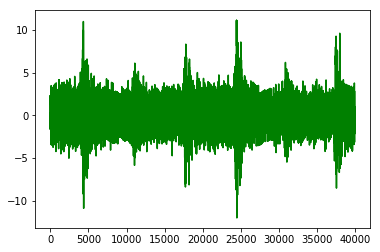

SIGNAL SAMPLE 20
Total time : 127.81982970237732 s


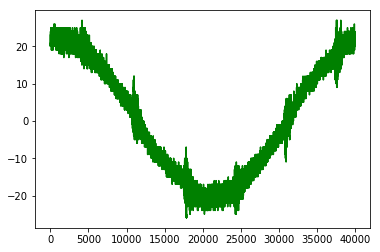

Trend


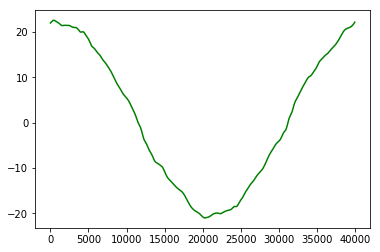

Noise


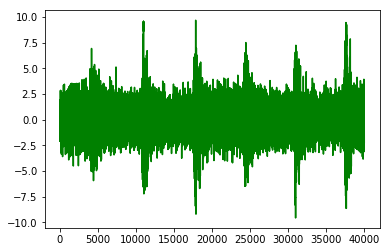

SIGNAL SAMPLE 21
Total time : 132.80299401283264 s


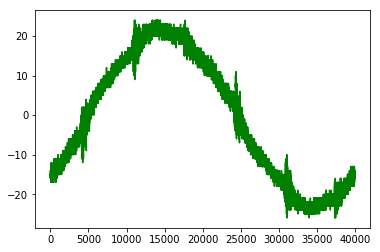

Trend


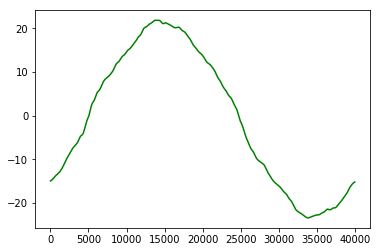

Noise


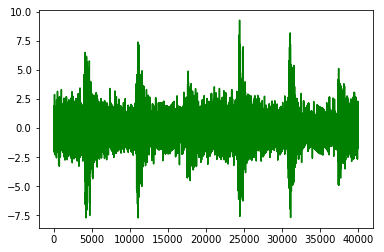

SIGNAL SAMPLE 22
Total time : 135.63741445541382 s


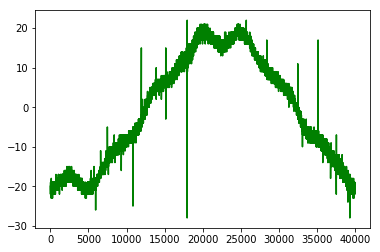

Trend


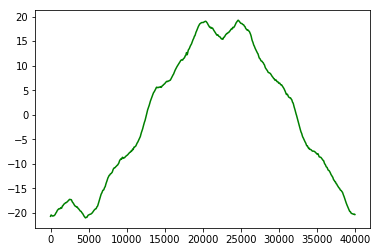

Noise


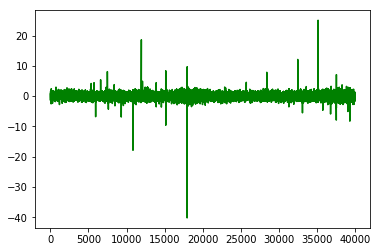

SIGNAL SAMPLE 23
Total time : 139.858247756958 s


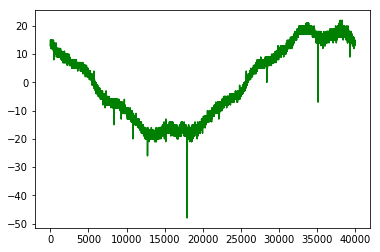

Trend


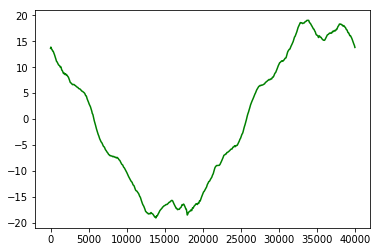

Noise


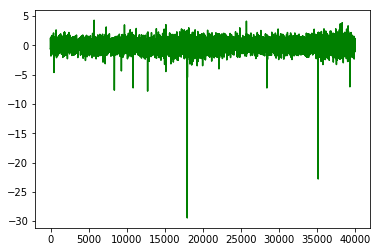

SIGNAL SAMPLE 24
Total time : 142.44005799293518 s


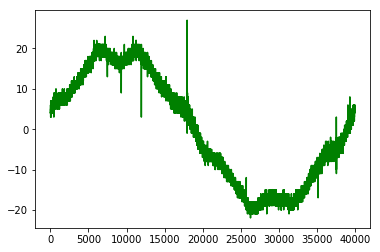

Trend


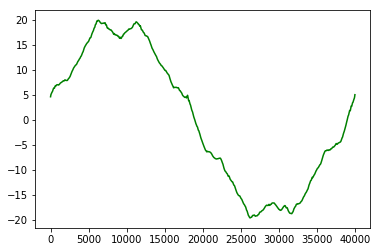

Noise


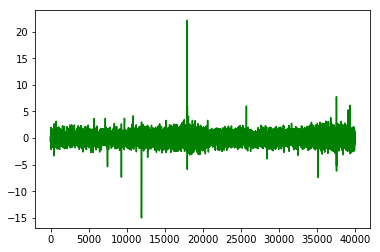

SIGNAL SAMPLE 25
Total time : 144.9217290878296 s


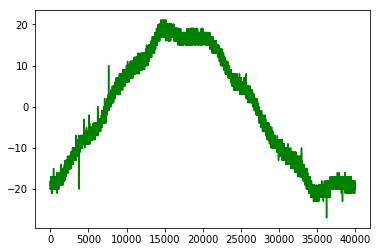

Trend


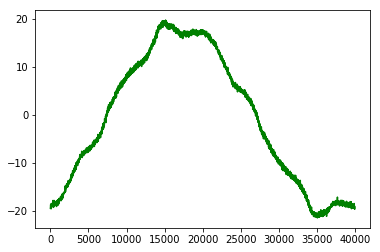

Noise


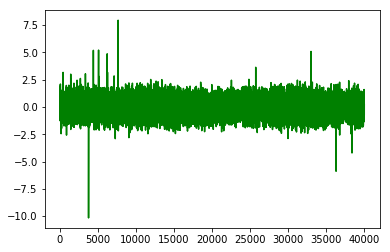

SIGNAL SAMPLE 26
Total time : 147.44333505630493 s


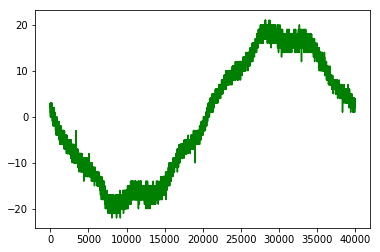

Trend


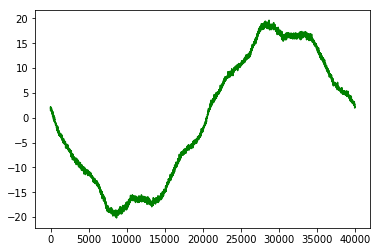

Noise


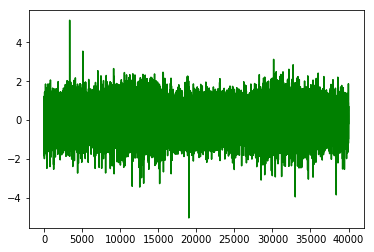

SIGNAL SAMPLE 27
Total time : 150.19944858551025 s


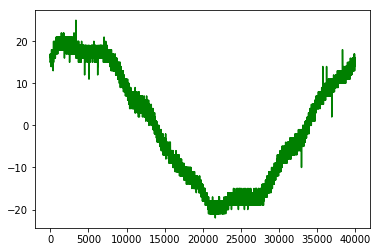

Trend


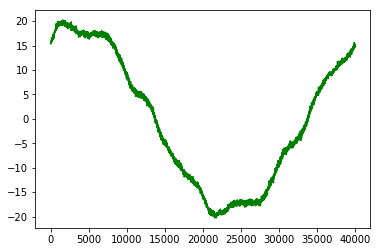

Noise


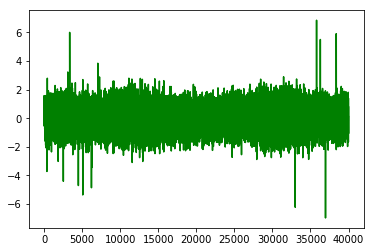

SIGNAL SAMPLE 28
Total time : 153.55835056304932 s


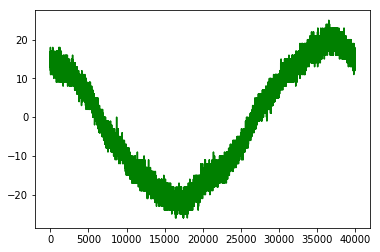

Trend


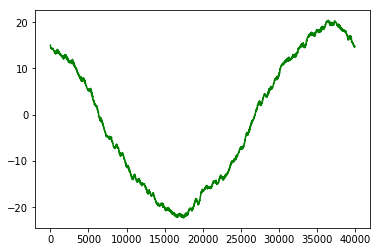

Noise


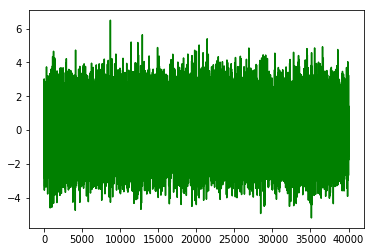

SIGNAL SAMPLE 29
Total time : 156.72156715393066 s


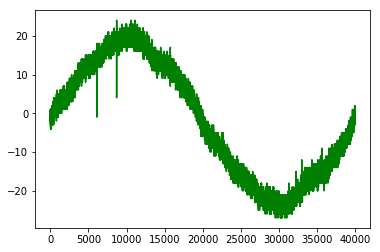

Trend


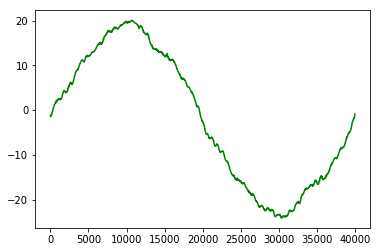

Noise


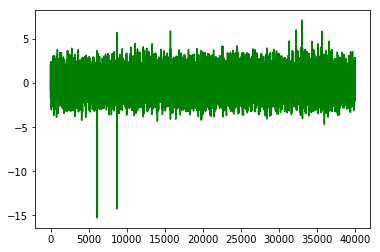

SIGNAL SAMPLE 30
Total time : 159.52244329452515 s


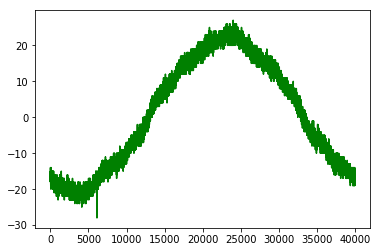

Trend


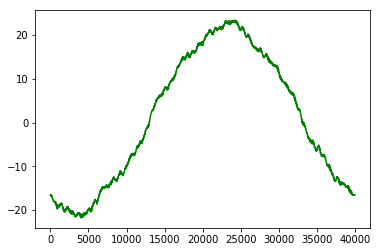

Noise


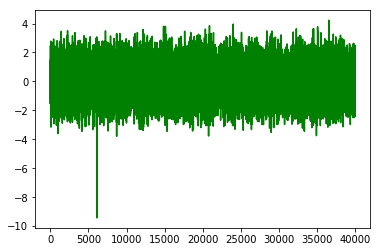

SIGNAL SAMPLE 31
Total time : 176.16419577598572 s


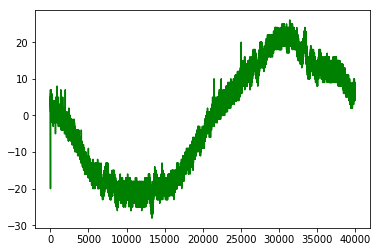

Trend


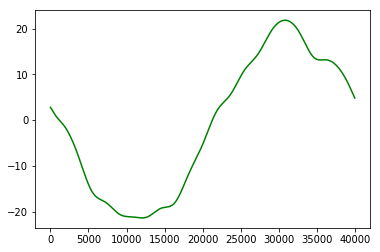

Noise


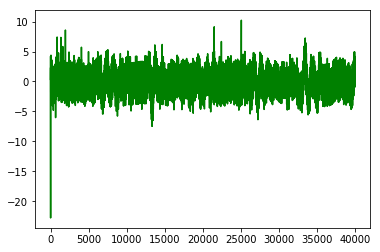

SIGNAL SAMPLE 32
Total time : 192.57429337501526 s


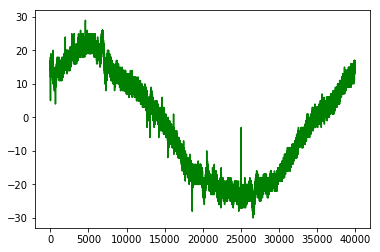

Trend


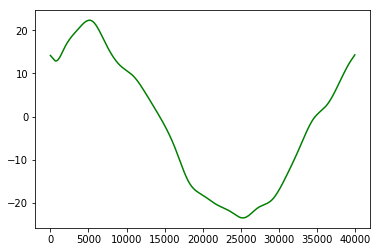

Noise


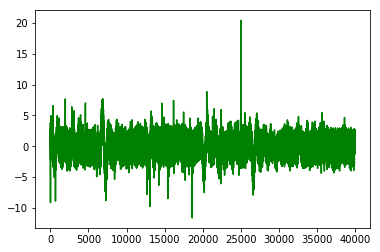

SIGNAL SAMPLE 33
Total time : 208.69211268424988 s


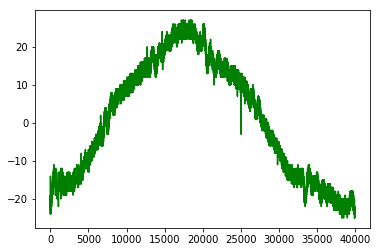

Trend


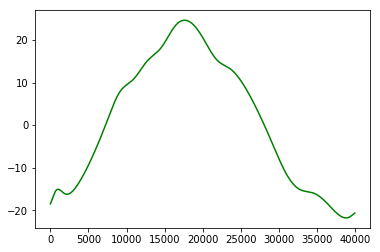

Noise


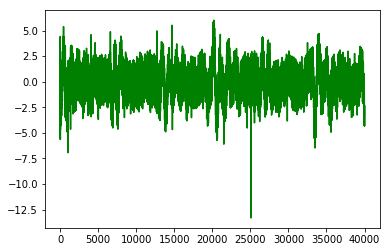

SIGNAL SAMPLE 34
Total time : 213.49410676956177 s


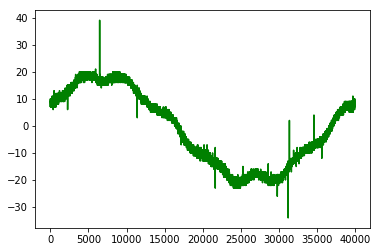

Trend


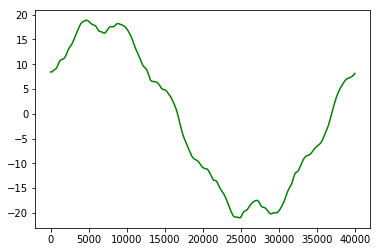

Noise


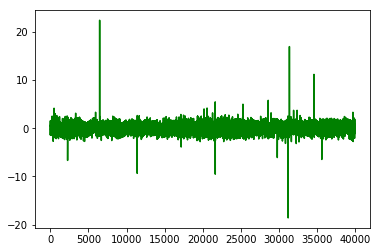

SIGNAL SAMPLE 35
Total time : 219.4728238582611 s


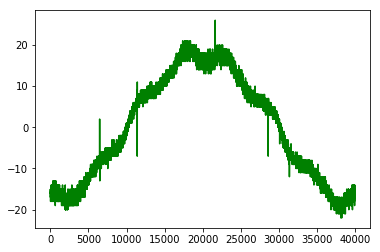

Trend


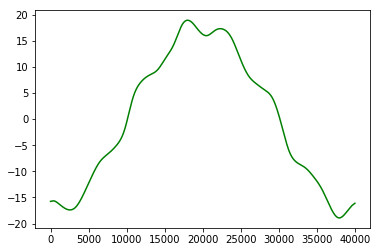

Noise


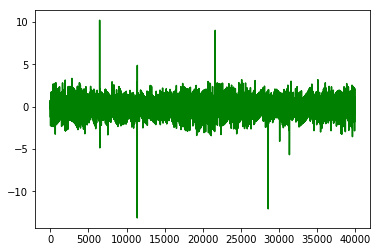

SIGNAL SAMPLE 36
Total time : 223.437917470932 s


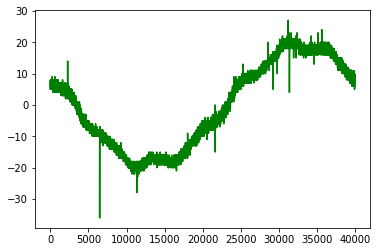

Trend


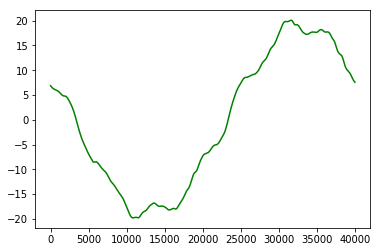

Noise


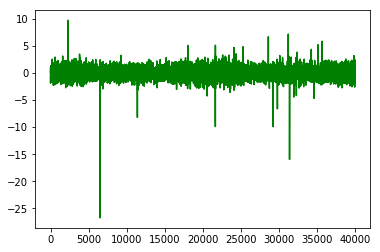

SIGNAL SAMPLE 37
Total time : 227.98813319206238 s


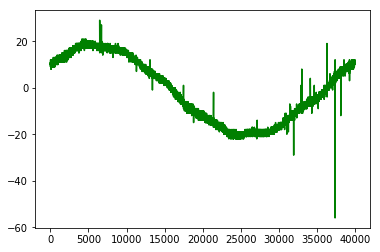

Trend


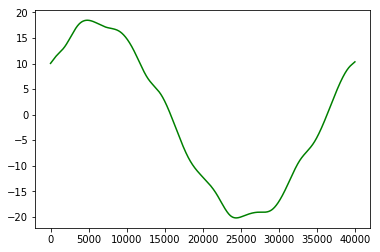

Noise


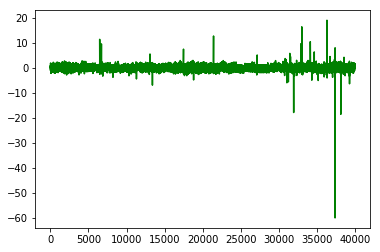

SIGNAL SAMPLE 38
Total time : 232.07220911979675 s


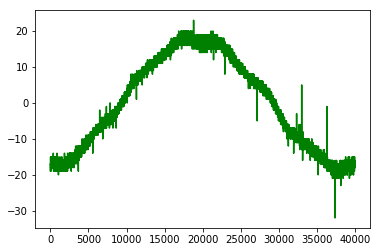

Trend


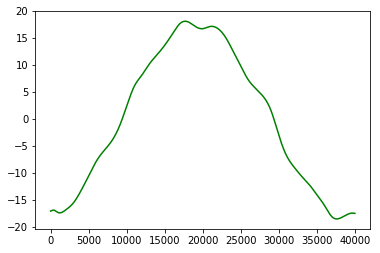

Noise


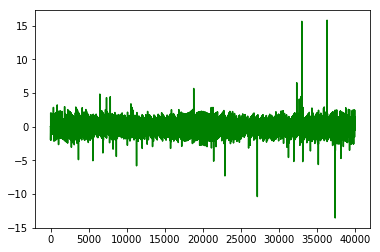

SIGNAL SAMPLE 39
Total time : 234.74240231513977 s


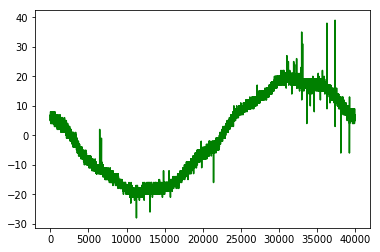

Trend


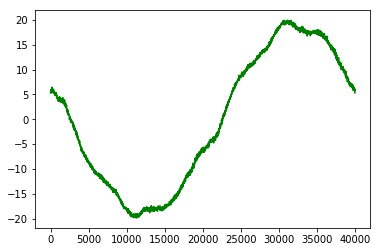

Noise


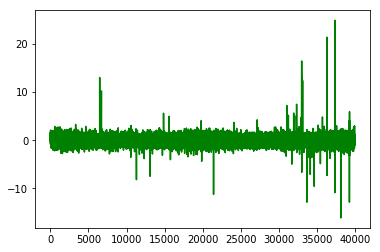

SIGNAL SAMPLE 40
Total time : 239.45735096931458 s


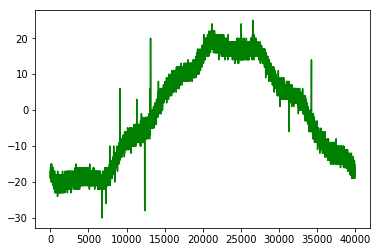

Trend


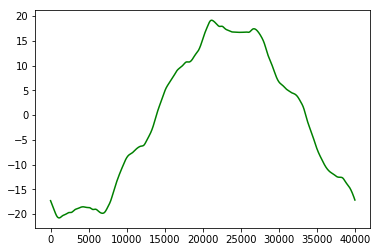

Noise


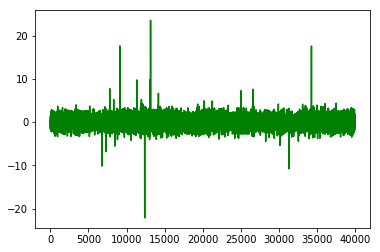

SIGNAL SAMPLE 41
Total time : 244.17544221878052 s


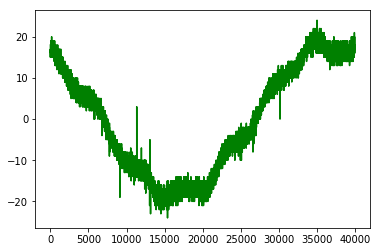

Trend


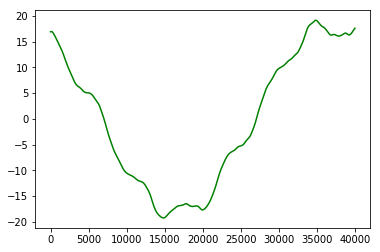

Noise


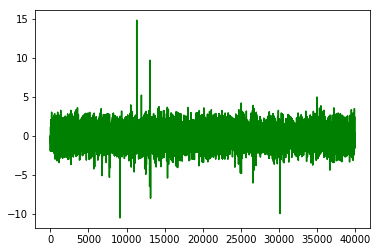

SIGNAL SAMPLE 42
Total time : 249.4728388786316 s


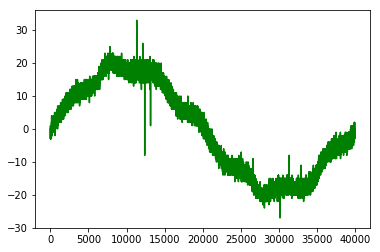

Trend


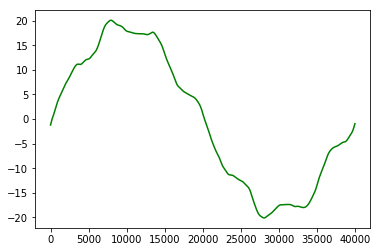

Noise


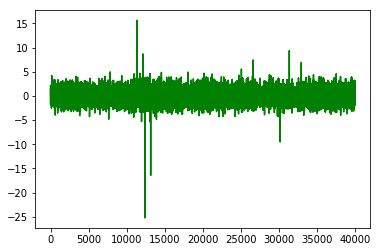

SIGNAL SAMPLE 43
Total time : 252.41339683532715 s


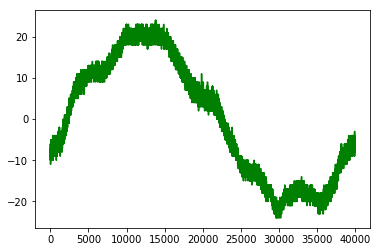

Trend


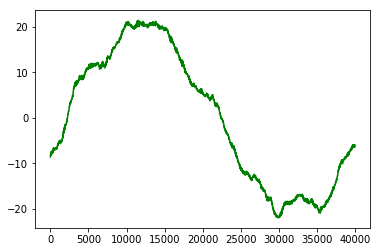

Noise


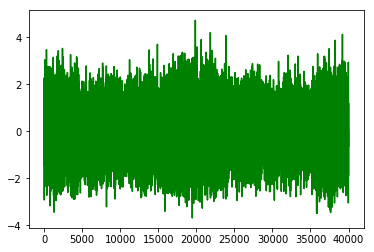

SIGNAL SAMPLE 44
Total time : 255.21340823173523 s


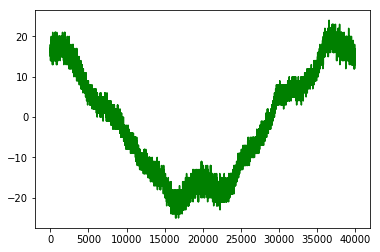

Trend


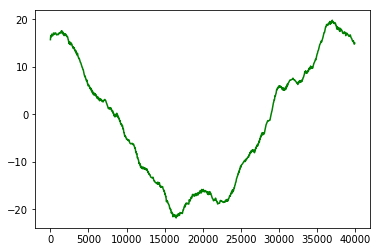

Noise


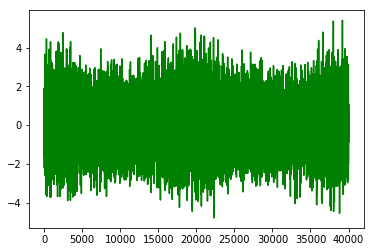

SIGNAL SAMPLE 45
Total time : 258.0356864929199 s


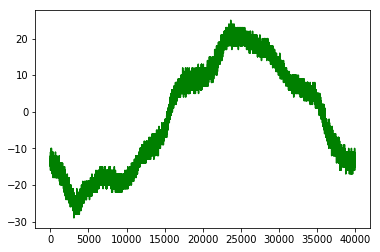

Trend


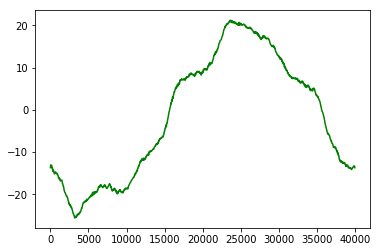

Noise


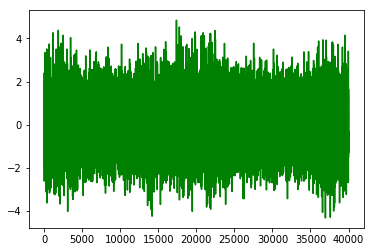

SIGNAL SAMPLE 46
Total time : 261.4611916542053 s


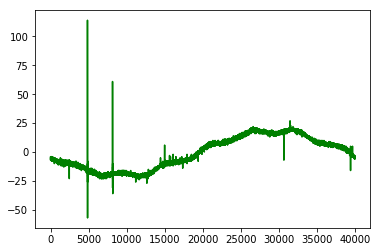

Trend


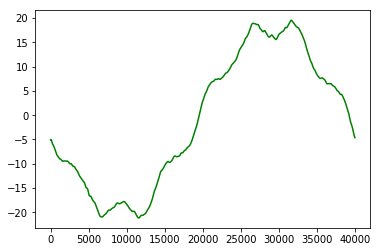

Noise


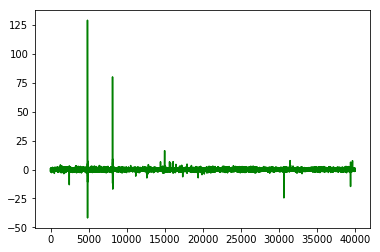

SIGNAL SAMPLE 47
Total time : 264.79428339004517 s


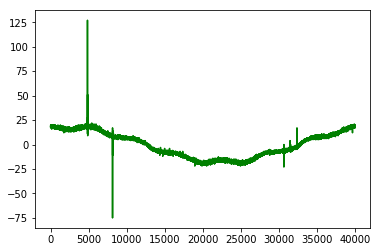

Trend


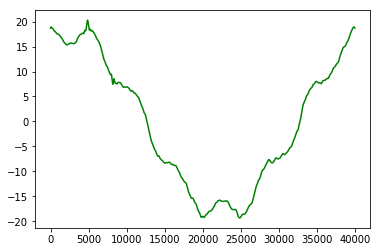

Noise


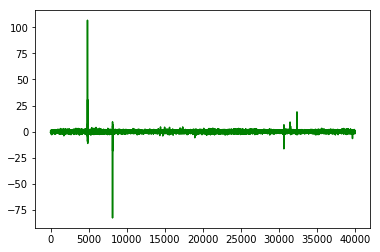

SIGNAL SAMPLE 48
Total time : 268.0846621990204 s


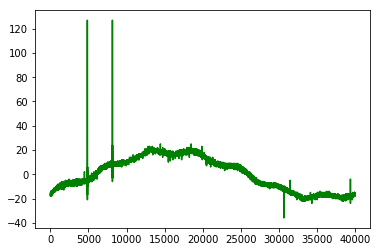

Trend


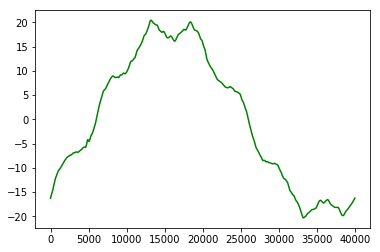

Noise


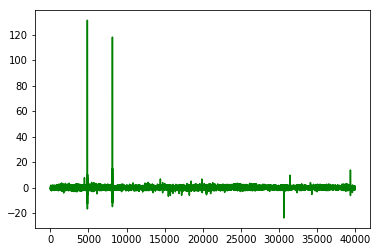

SIGNAL SAMPLE 49
Total time : 271.35143995285034 s


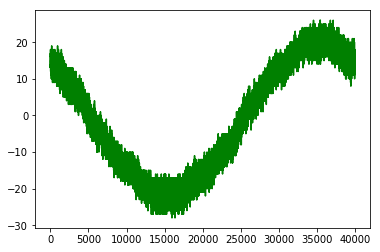

Trend


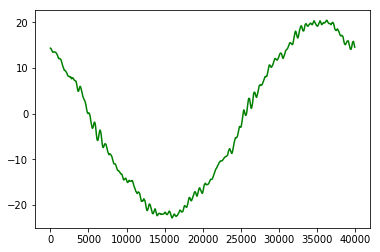

Noise


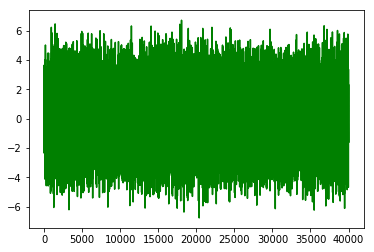

SIGNAL SAMPLE 50
Total time : 274.6459422111511 s


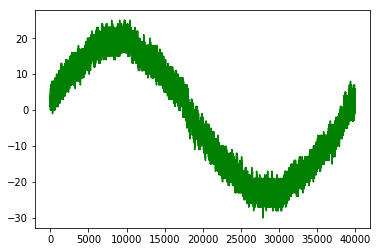

Trend


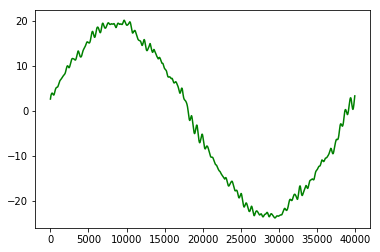

Noise


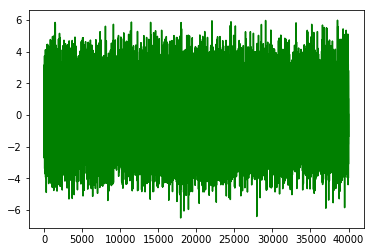

In [5]:
s = time.time()
for i in range(50):
    signal = neg_signals[i]
    short_signal = signal[indices]
    seasons, trend = fit_seasons(short_signal)
    e = time.time()
    print("SIGNAL SAMPLE {}".format(i+1))
    print("Total time : {}".format(str(e - s) + " s"))
    
    color = 'g'
    plt.plot(short_signal, color)
    plt.show()
    print("Trend")
    plt.plot(trend, color)
    plt.show()
    print("Noise")
    plt.plot(short_signal - trend, color)
    plt.show()

**Visualize the actual signals and noises for faulty cases**

SIGNAL SAMPLE 1
Total time : 10.888015747070312 s


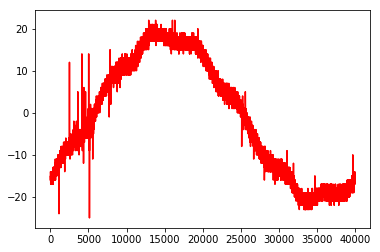

Trend


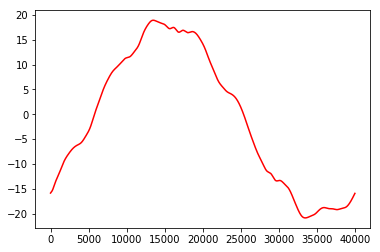

Noise


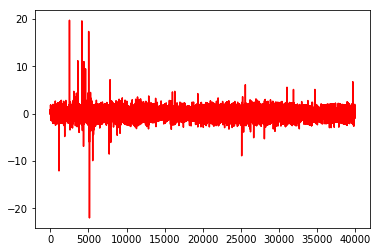

SIGNAL SAMPLE 2
Total time : 22.418787479400635 s


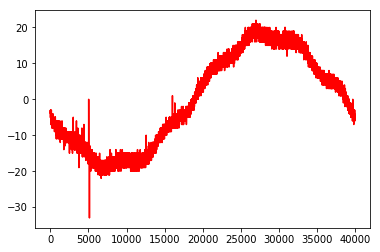

Trend


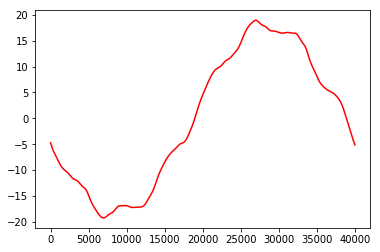

Noise


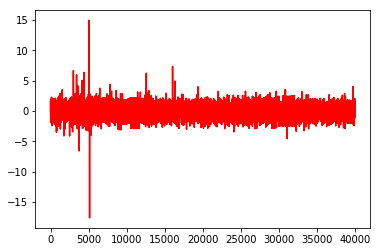

SIGNAL SAMPLE 3
Total time : 33.95807147026062 s


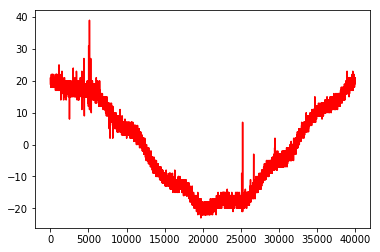

Trend


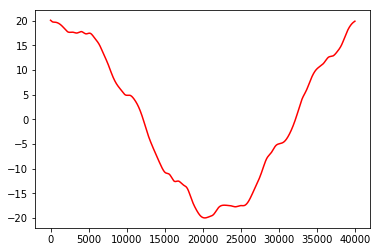

Noise


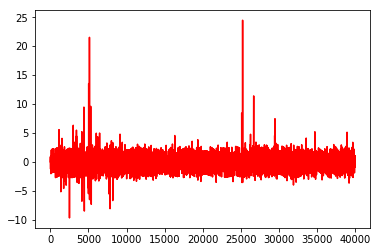

SIGNAL SAMPLE 4
Total time : 36.547260761260986 s


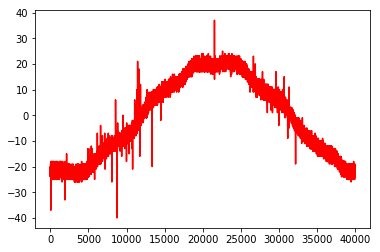

Trend


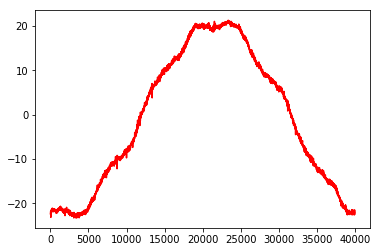

Noise


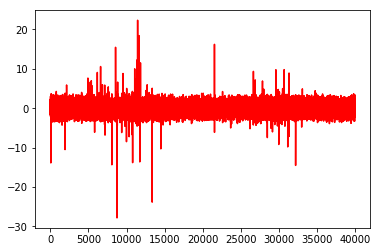

SIGNAL SAMPLE 5
Total time : 39.34716463088989 s


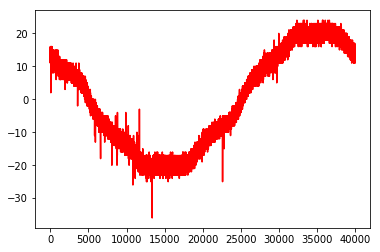

Trend


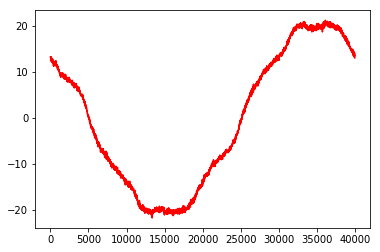

Noise


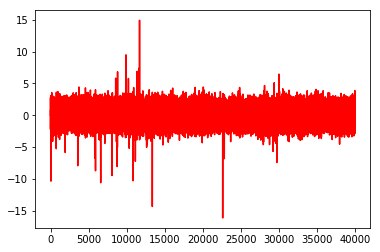

SIGNAL SAMPLE 6
Total time : 42.21093153953552 s


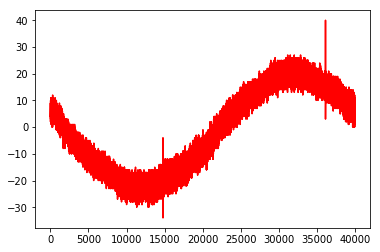

Trend


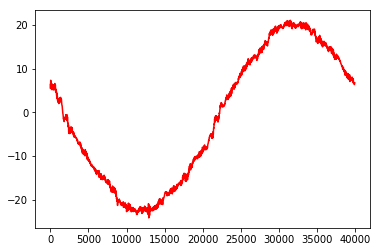

Noise


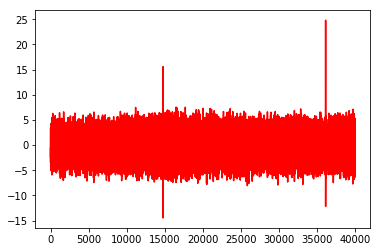

SIGNAL SAMPLE 7
Total time : 44.98467230796814 s


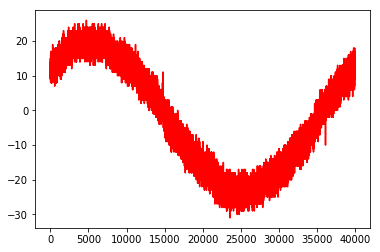

Trend


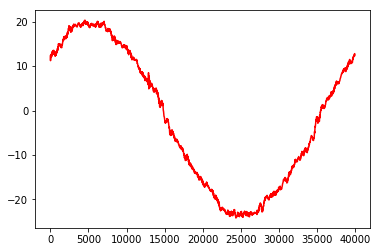

Noise


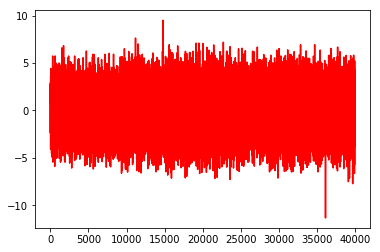

SIGNAL SAMPLE 8
Total time : 48.02317762374878 s


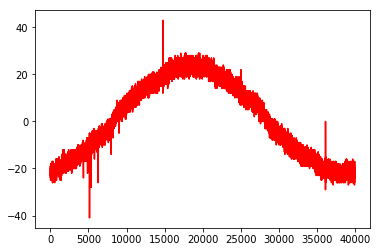

Trend


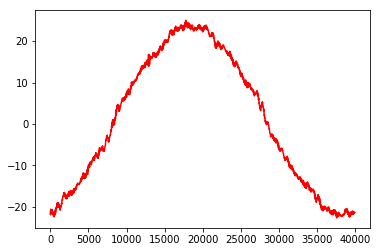

Noise


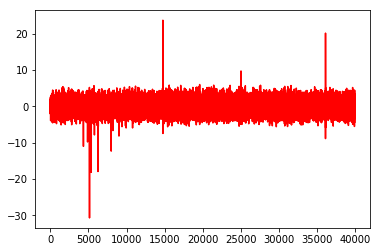

SIGNAL SAMPLE 9
Total time : 51.355947971343994 s


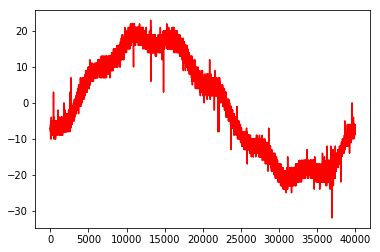

Trend


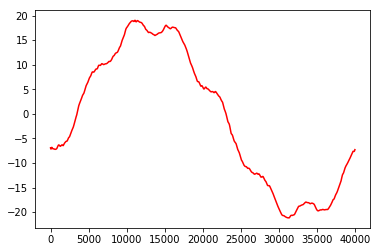

Noise


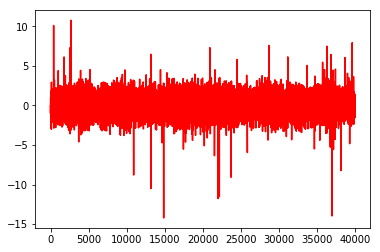

SIGNAL SAMPLE 10
Total time : 54.360225439071655 s


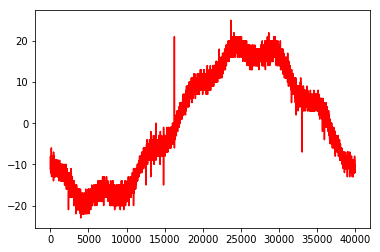

Trend


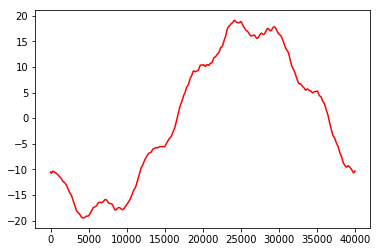

Noise


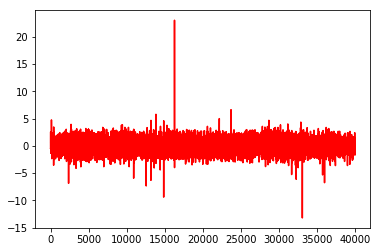

SIGNAL SAMPLE 11
Total time : 57.41568875312805 s


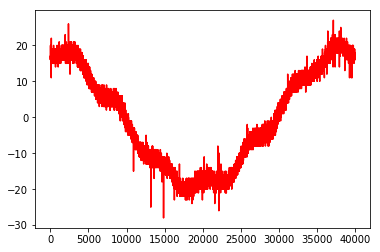

Trend


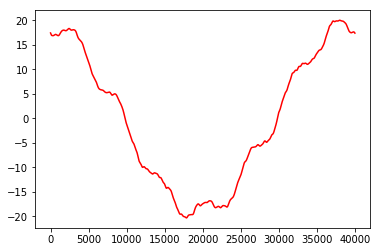

Noise


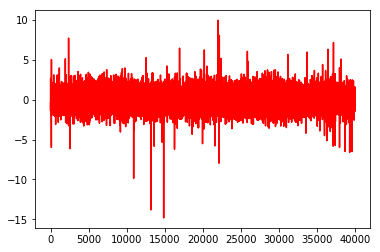

SIGNAL SAMPLE 12
Total time : 61.05505394935608 s


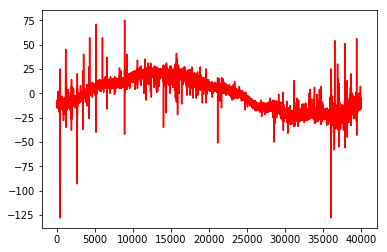

Trend


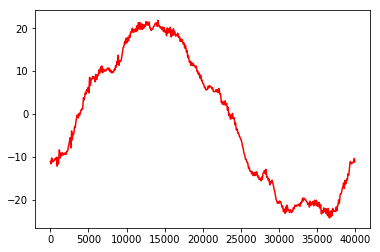

Noise


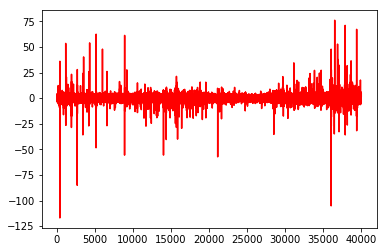

SIGNAL SAMPLE 13
Total time : 65.83283543586731 s


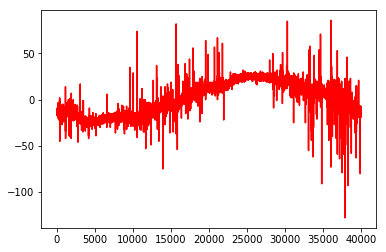

Trend


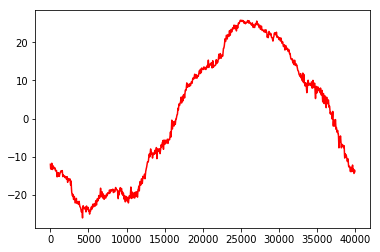

Noise


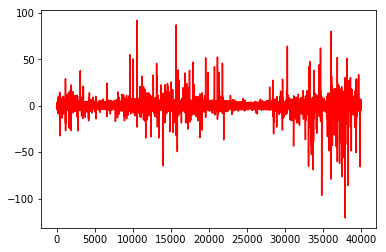

SIGNAL SAMPLE 14
Total time : 69.03594923019409 s


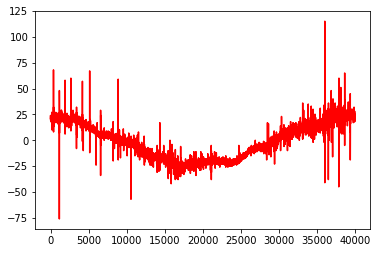

Trend


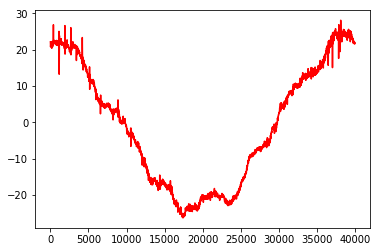

Noise


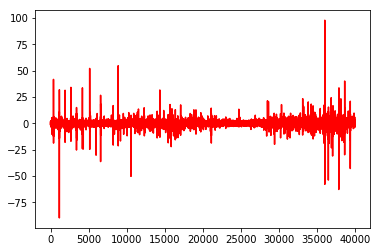

SIGNAL SAMPLE 15
Total time : 71.78174328804016 s


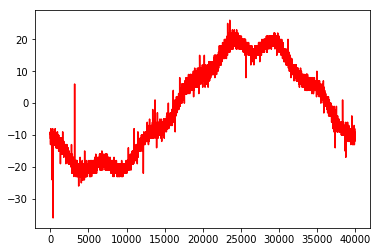

Trend


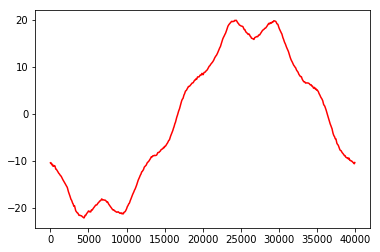

Noise


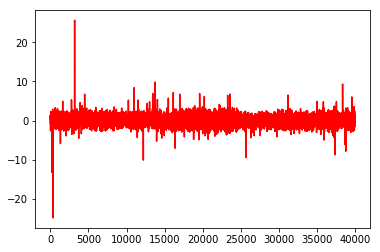

SIGNAL SAMPLE 16
Total time : 74.40750074386597 s


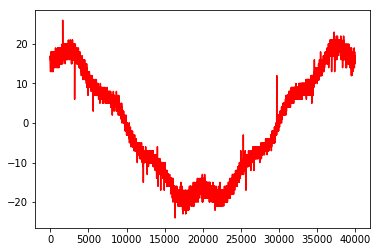

Trend


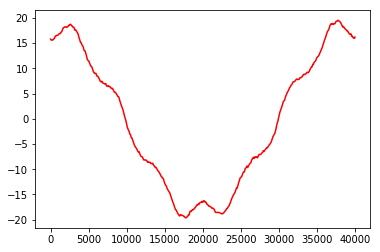

Noise


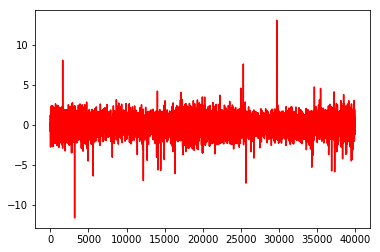

SIGNAL SAMPLE 17
Total time : 77.04070115089417 s


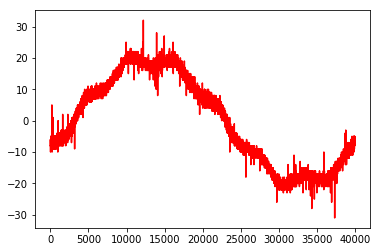

Trend


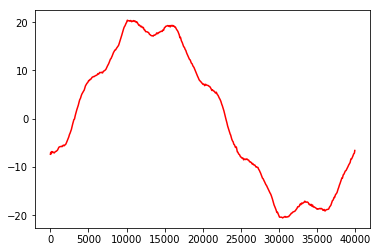

Noise


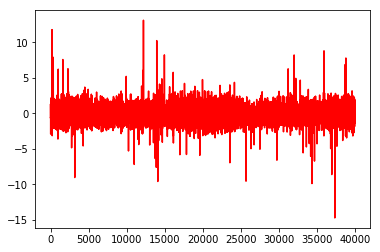

SIGNAL SAMPLE 18
Total time : 81.22147989273071 s


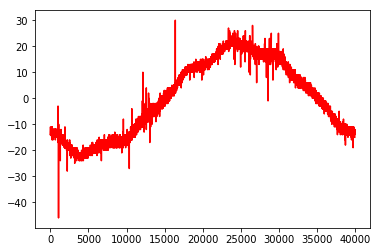

Trend


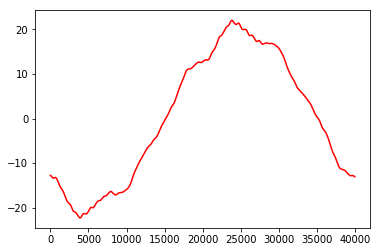

Noise


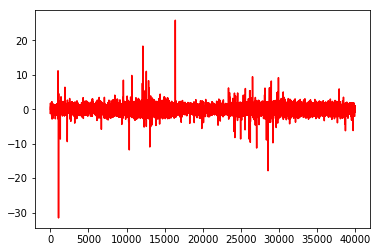

SIGNAL SAMPLE 19
Total time : 84.3021674156189 s


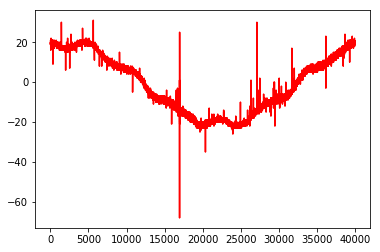

Trend


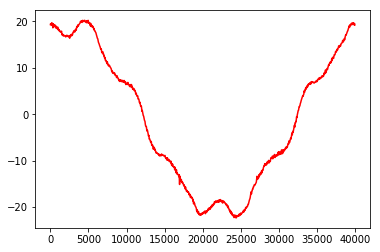

Noise


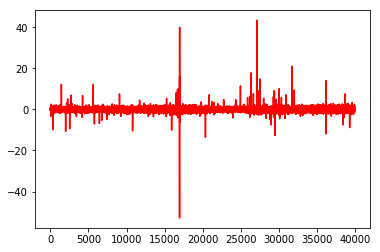

SIGNAL SAMPLE 20
Total time : 87.46246433258057 s


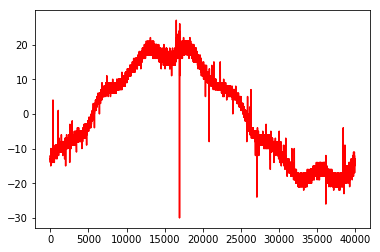

Trend


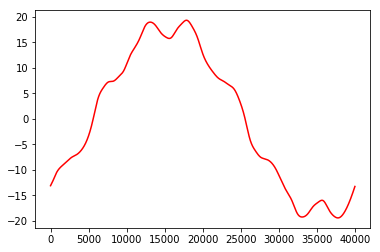

Noise


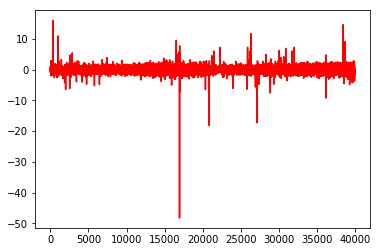

SIGNAL SAMPLE 21
Total time : 90.44377827644348 s


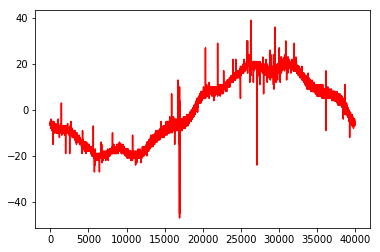

Trend


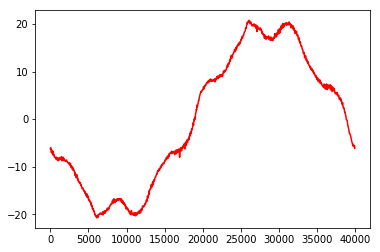

Noise


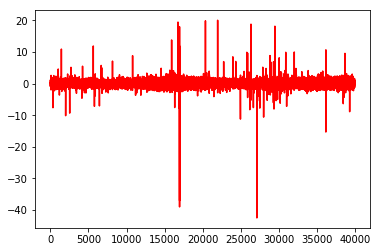

SIGNAL SAMPLE 22
Total time : 107.3542423248291 s


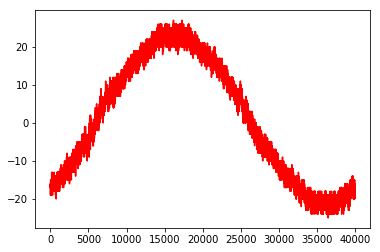

Trend


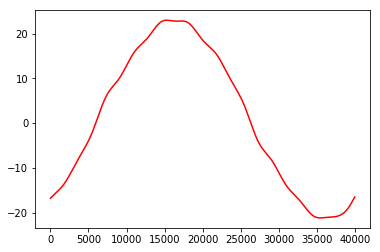

Noise


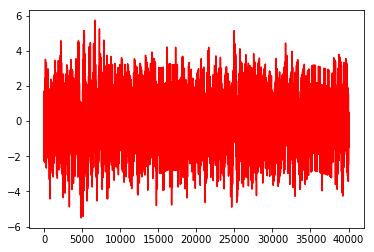

SIGNAL SAMPLE 23
Total time : 109.99094367027283 s


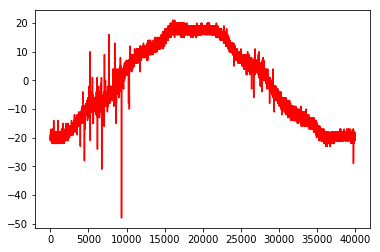

Trend


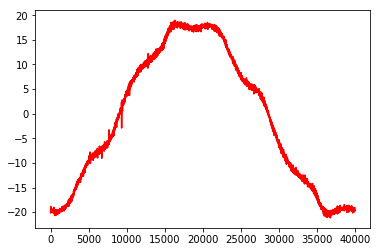

Noise


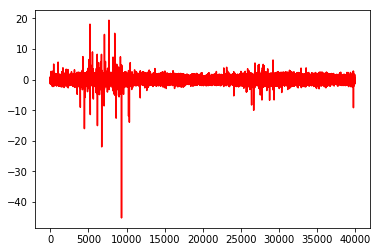

SIGNAL SAMPLE 24
Total time : 112.56813454627991 s


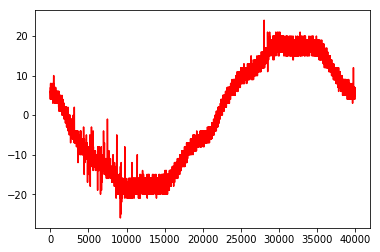

Trend


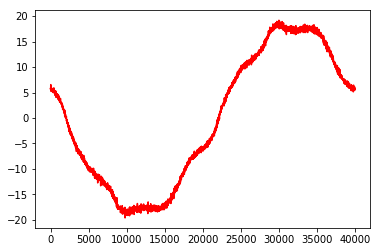

Noise


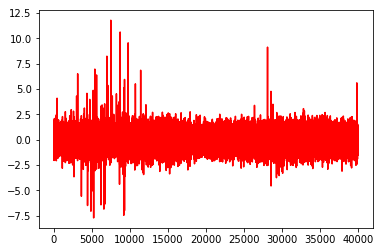

SIGNAL SAMPLE 25
Total time : 115.27233552932739 s


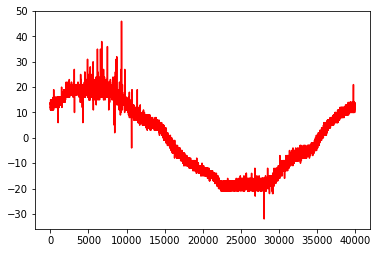

Trend


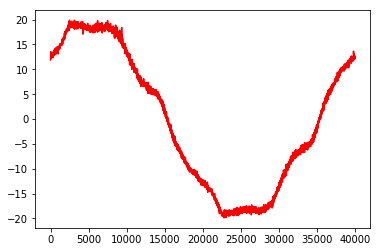

Noise


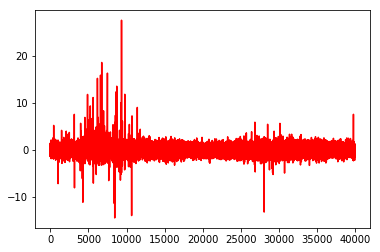

SIGNAL SAMPLE 26
Total time : 118.17343235015869 s


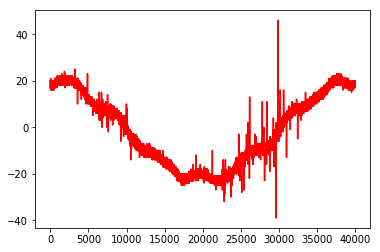

Trend


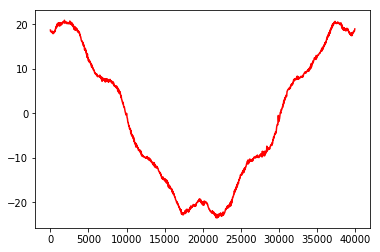

Noise


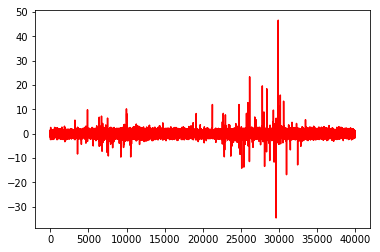

SIGNAL SAMPLE 27
Total time : 120.88452386856079 s


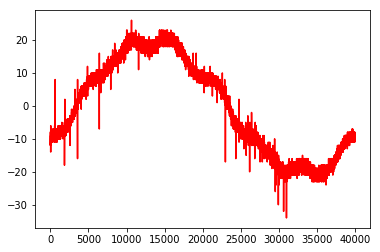

Trend


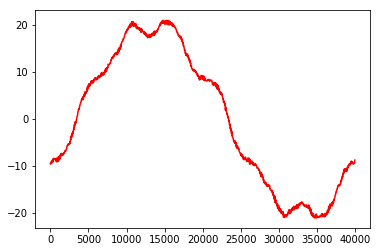

Noise


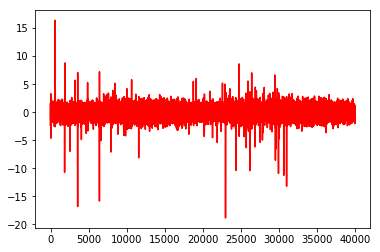

SIGNAL SAMPLE 28
Total time : 123.56103348731995 s


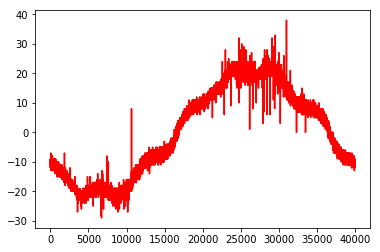

Trend


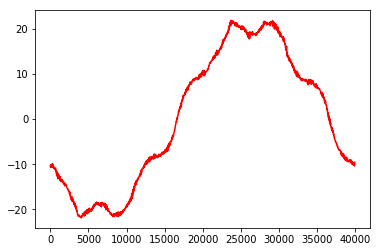

Noise


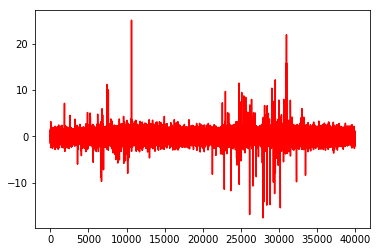

SIGNAL SAMPLE 29
Total time : 126.2469961643219 s


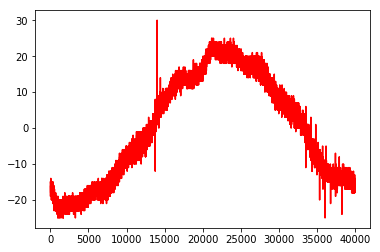

Trend


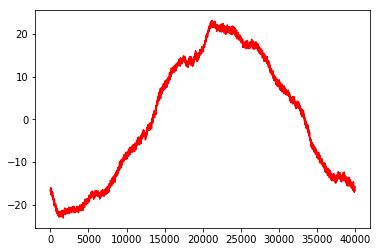

Noise


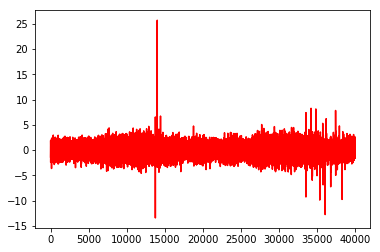

SIGNAL SAMPLE 30
Total time : 129.26637840270996 s


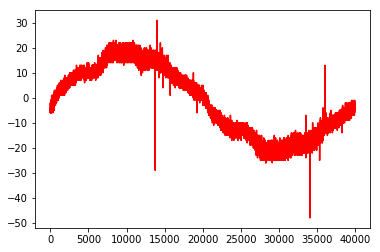

Trend


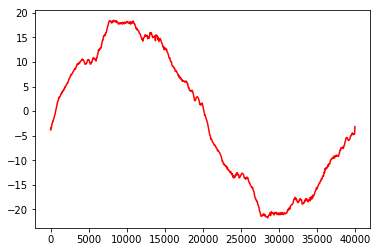

Noise


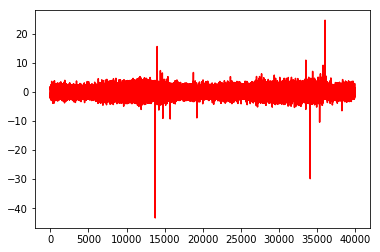

SIGNAL SAMPLE 31
Total time : 131.96222400665283 s


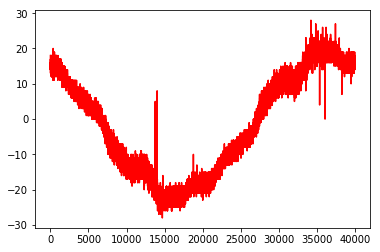

Trend


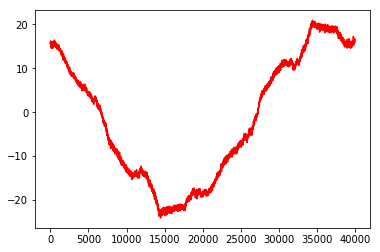

Noise


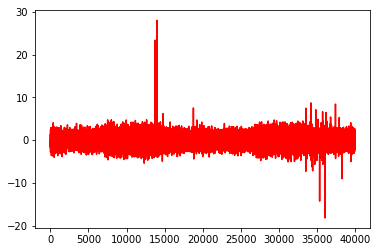

SIGNAL SAMPLE 32
Total time : 135.37405824661255 s


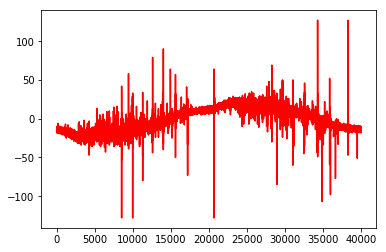

Trend


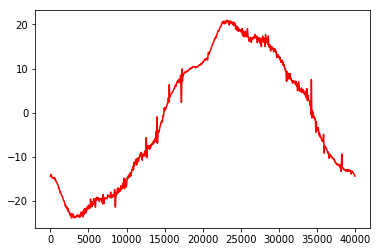

Noise


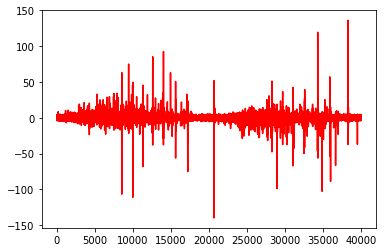

SIGNAL SAMPLE 33
Total time : 138.81758832931519 s


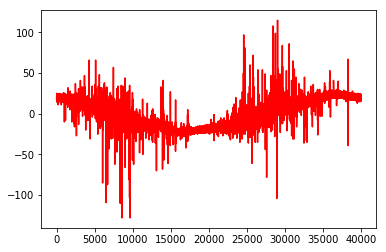

Trend


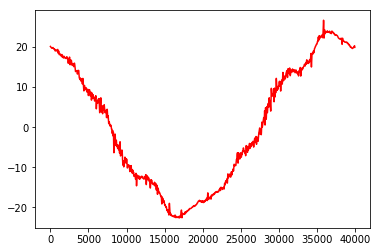

Noise


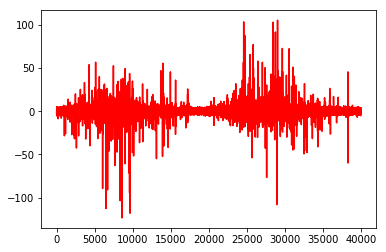

SIGNAL SAMPLE 34
Total time : 141.6766278743744 s


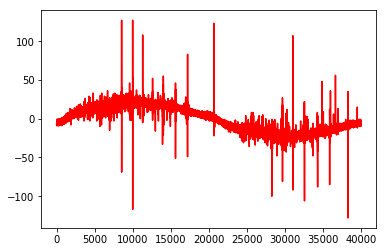

Trend


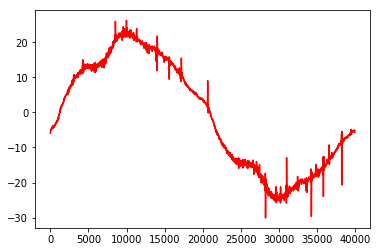

Noise


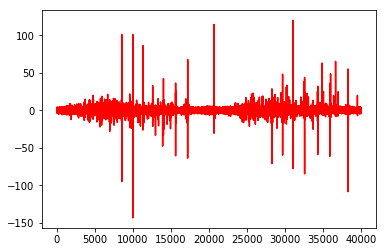

SIGNAL SAMPLE 35
Total time : 144.7486400604248 s


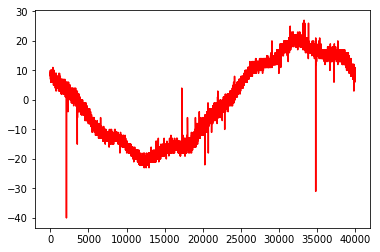

Trend


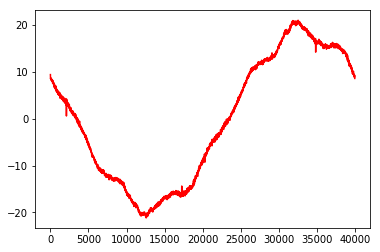

Noise


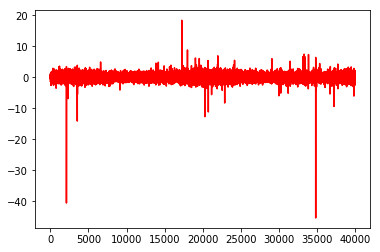

SIGNAL SAMPLE 36
Total time : 149.70225024223328 s


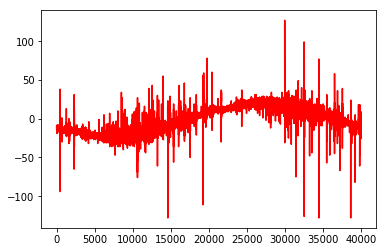

Trend


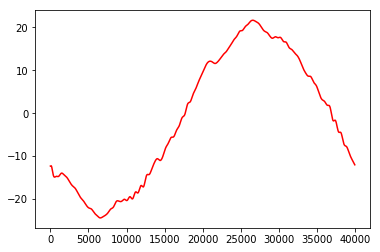

Noise


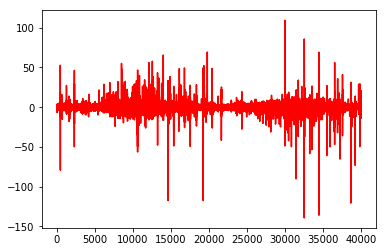

SIGNAL SAMPLE 37
Total time : 154.57990026474 s


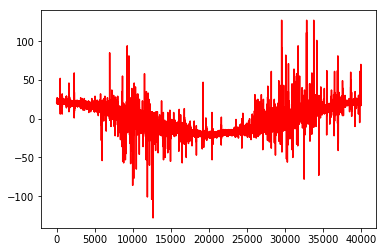

Trend


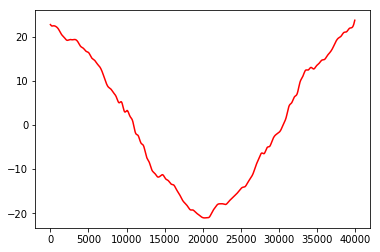

Noise


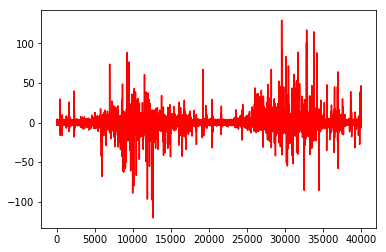

SIGNAL SAMPLE 38
Total time : 159.4117271900177 s


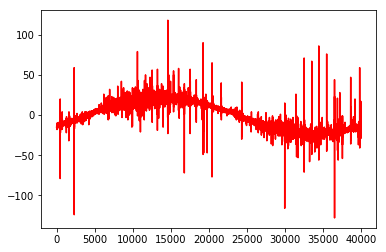

Trend


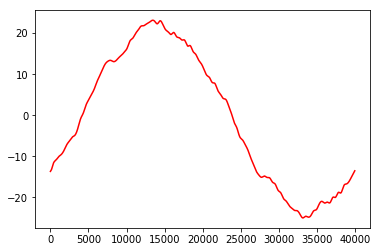

Noise


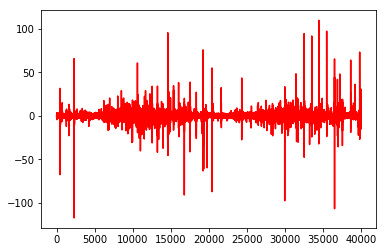

SIGNAL SAMPLE 39
Total time : 164.2721004486084 s


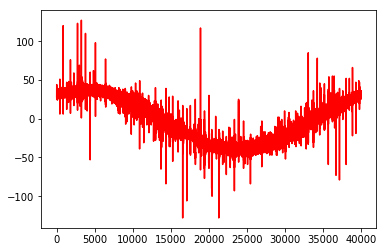

Trend


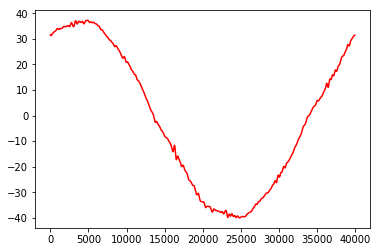

Noise


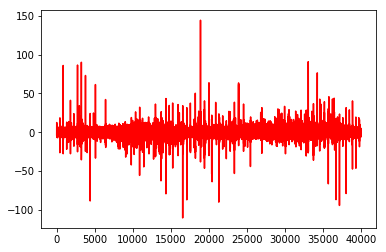

SIGNAL SAMPLE 40
Total time : 168.60088801383972 s


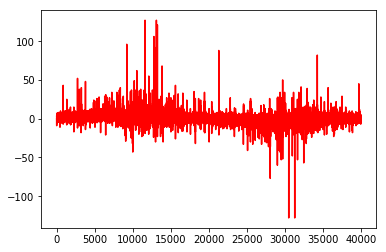

Trend


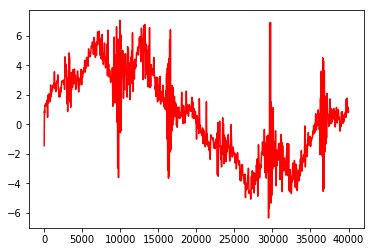

Noise


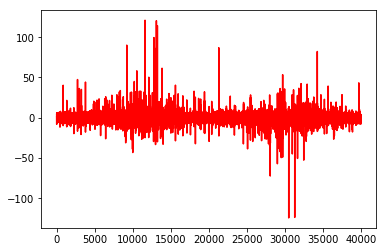

SIGNAL SAMPLE 41
Total time : 171.46956157684326 s


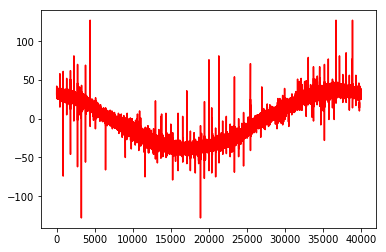

Trend


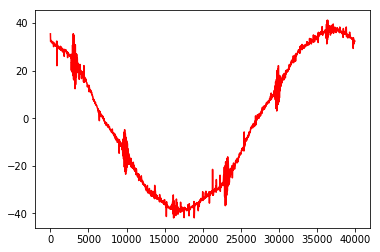

Noise


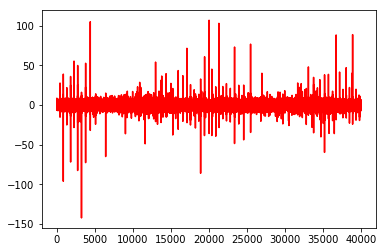

SIGNAL SAMPLE 42
Total time : 180.79231810569763 s


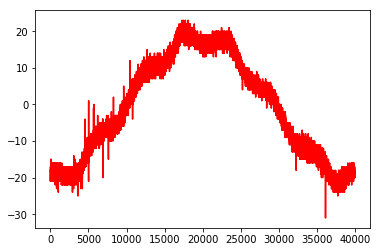

Trend


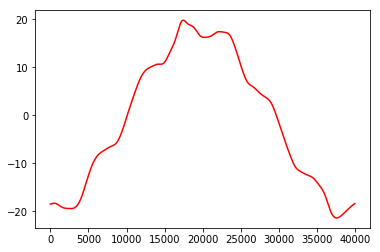

Noise


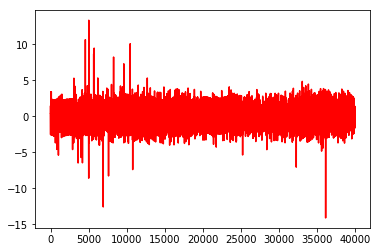

SIGNAL SAMPLE 43
Total time : 190.03925895690918 s


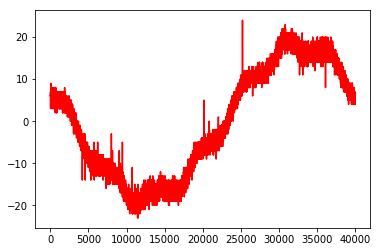

Trend


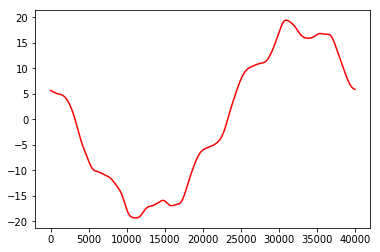

Noise


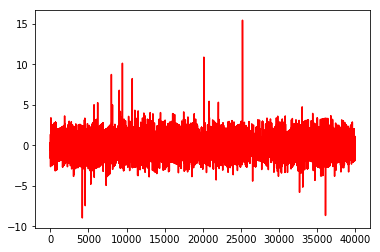

SIGNAL SAMPLE 44
Total time : 199.36410117149353 s


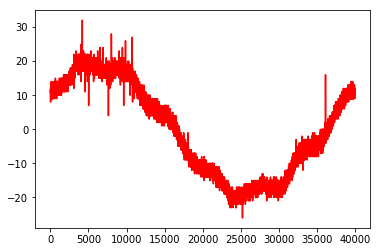

Trend


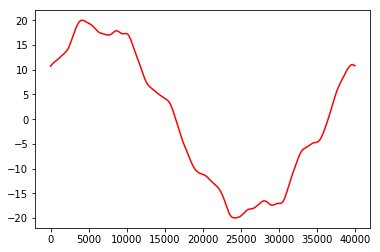

Noise


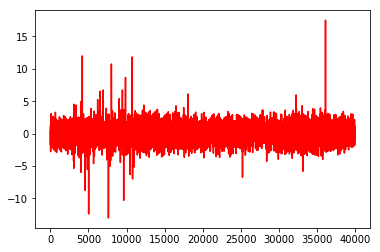

SIGNAL SAMPLE 45
Total time : 215.138738155365 s


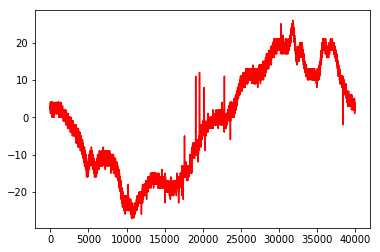

Trend


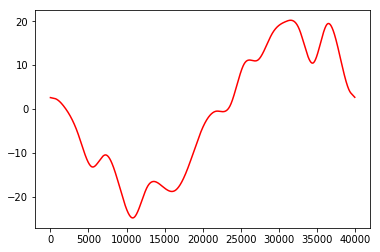

Noise


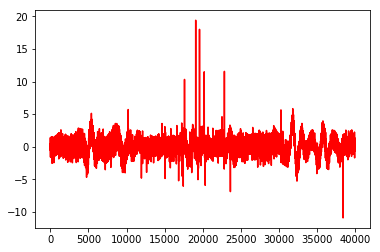

SIGNAL SAMPLE 46
Total time : 231.39140844345093 s


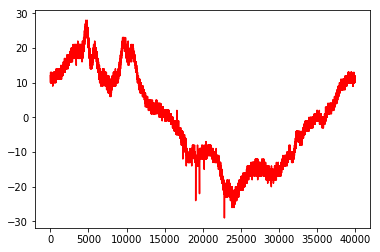

Trend


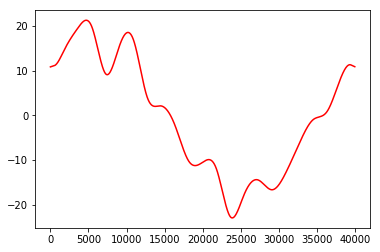

Noise


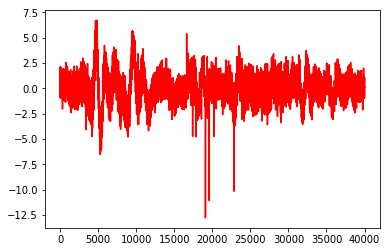

SIGNAL SAMPLE 47
Total time : 247.57673406600952 s


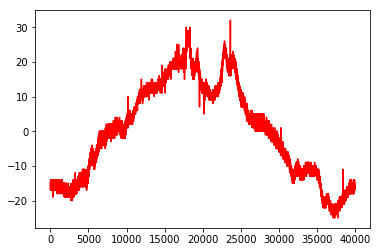

Trend


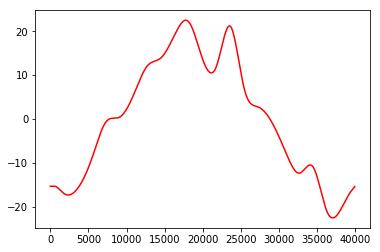

Noise


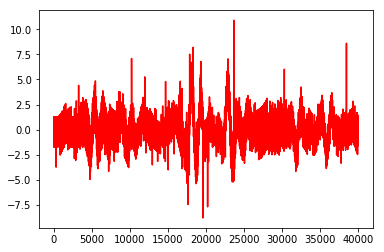

SIGNAL SAMPLE 48
Total time : 253.10360980033875 s


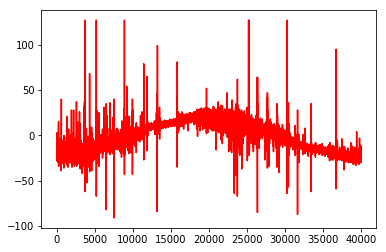

Trend


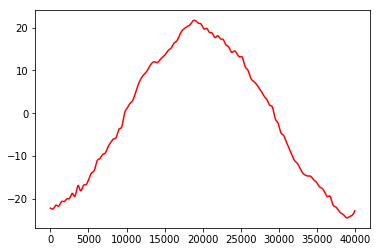

Noise


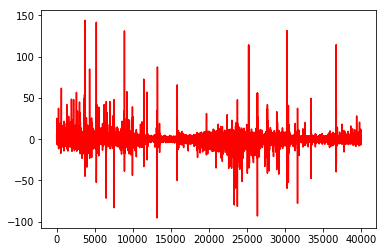

SIGNAL SAMPLE 49
Total time : 258.05537819862366 s


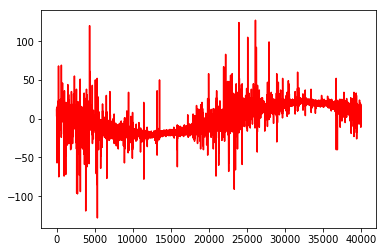

Trend


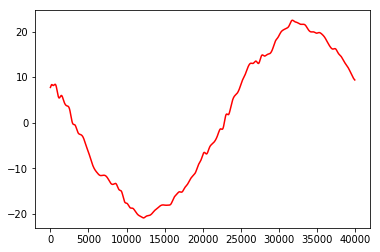

Noise


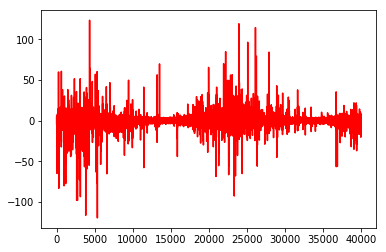

SIGNAL SAMPLE 50
Total time : 263.18972420692444 s


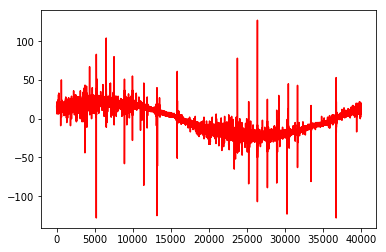

Trend


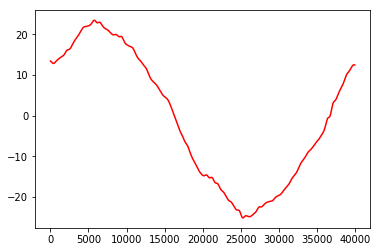

Noise


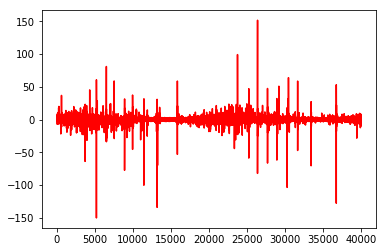

In [6]:
s = time.time()
for i in range(50):
    signal = pos_signals[i]
    short_signal = signal[indices]
    seasons, trend = fit_seasons(short_signal)
    e = time.time()
    print("SIGNAL SAMPLE {}".format(i+1))
    print("Total time : {}".format(str(e - s) + " s"))
    
    color = 'r'
    plt.plot(short_signal, color)
    plt.show()
    print("Trend")
    plt.plot(trend, color)
    plt.show()
    print("Noise")
    plt.plot(short_signal - trend, color)
    plt.show()

## One can clearly see the potential discharges in the noise graphs of the faulty cases. But, please feel free to share any other insights you can find from these plots.